Game player
---

In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import connect4

In [59]:
class Player:
    def __init__(self, name = 'Anders', num_actions = 7, random_seed = 2022):
        self.name = name
        self.num_actions = num_actions
        self.rng = np.random.default_rng(random_seed)
        
    def decide_random(self):
        decision = self.rng.choice(self.num_actions)
        return decision

# class C4Model(keras.models.Model):
#     def __init__(self, num_actions = 7, hidden_size = 1080)

class PlayerAC(Player):
    def __init__(self, name = 'Anders', num_actions = 7, hidden_size = 1080, random_seed = 2022):
        super().__init__(name, num_actions, random_seed)
        self.input_layer = tf.keras.Input(shape = (6,7), name = 'input layer')
        self.convolution_h = tf.keras.layers.Conv2D(8,
                                                    (1,4),
                                                    activation='relu',
                                                    input_shape = (6,7),
                                                    name = 'horizontal convolution'
                                                   )
        self.convolution_v = tf.keras.layers.Conv2D(8,
                                                    (4,1),
                                                    activation='relu',
                                                    input_shape = (6,7),
                                                    name = 'vertical convolution'
                                                   )
        self.convolution_square = tf.keras.layers.Conv2D(2,
                                                         (4,4),
                                                         activation='relu',
                                                         input_shape = (6,7),
                                                         name = 'square convolution'
                                                        )
        self.common1 = tf.keras.layers.Dense(hidden_size,
                                             activation = 'relu',
                                            name = 'common 1')
        self.actor = tf.keras.layers.Dense(1,
                                    activation = 'softmax',
                                    name = 'actor'
                                   )
        
    def call(self, this_input):
        inputs = tf.expand_dims(this_input, 3)
        hx = self.convolution_h(inputs)
        vx = self.convolution_v(inputs)
        sqx = self.convolution_square(inputs)
        x = self.common1([hx,vx,sqx,inputs])
        out = self.actor(x)
        

In [60]:
play = PlayerAC()

In [61]:
play.call(tf.convert_to_tensor([c4.grid.astype('float32')]))

InvalidArgumentError: ConcatOp : Dimension 1 in both shapes must be equal: shape[0] = [1,6,4,8] vs. shape[1] = [1,3,7,8] [Op:ConcatV2] name: concat

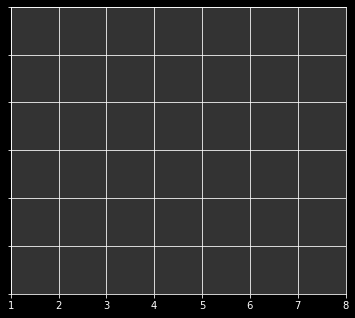

In [27]:
player = Player()
c4 = connect4.ConnectFour()
c4.show()

In [12]:
c4.play(player.decide_random())

True

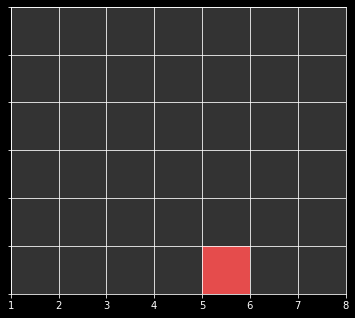

In [13]:
c4.show()

Player -1 wins in 26 turns.


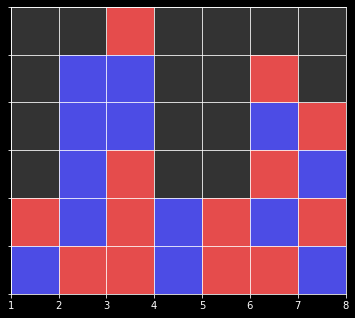

In [26]:
#pit two players against each other
player1 = Player(name='Bea', random_seed=202233)
player2 = Player(name='Chance', random_seed=2025341234542)
c4 = connect4.ConnectFour()

players = [player1, player2]
current_player = 0
board_changed = False
while not c4.done:
    board_changed = c4.play(players[current_player].decide_random())
    if board_changed:
        current_player = not current_player
        
        
c4.show()

Training
---